# **Geological Logging Classification Project**

## **1. Business Understanding**
The goal of this project is to predict Lithology from geophysical log data such as RHOB, GR, and NPHI. Accurate lithology prediction is crucial in geological logging as it helps in understanding the subsurface geological formations, which is essential for exploration and production activities.

## **2. Data Understanding**

In [11]:
import pandas as pd
import numpy as np
data_path = 'Data/force2020_data_unsupervised_learning.csv'
data = pd.read_csv(data_path)
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


### **Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB
None
               RHOB            GR      DEPTH_MD          NPHI           PEF  \
count  18270.000000  18270.000000  18270.000000  14032.000000  16440.000000   
mean       2.110451     63.847477   1883.228478      0.404547      3.463851   
std        0.297725     28.636331    801.941195      0.133532      2.561239   
min        1.404576      6.191506    494.528000      0.024330      1.010027   
25%        1.963399     43.866690   1188.750000      0.315346      2.320836   
50%        2.055079     66.777851   1882.972000      0.4485

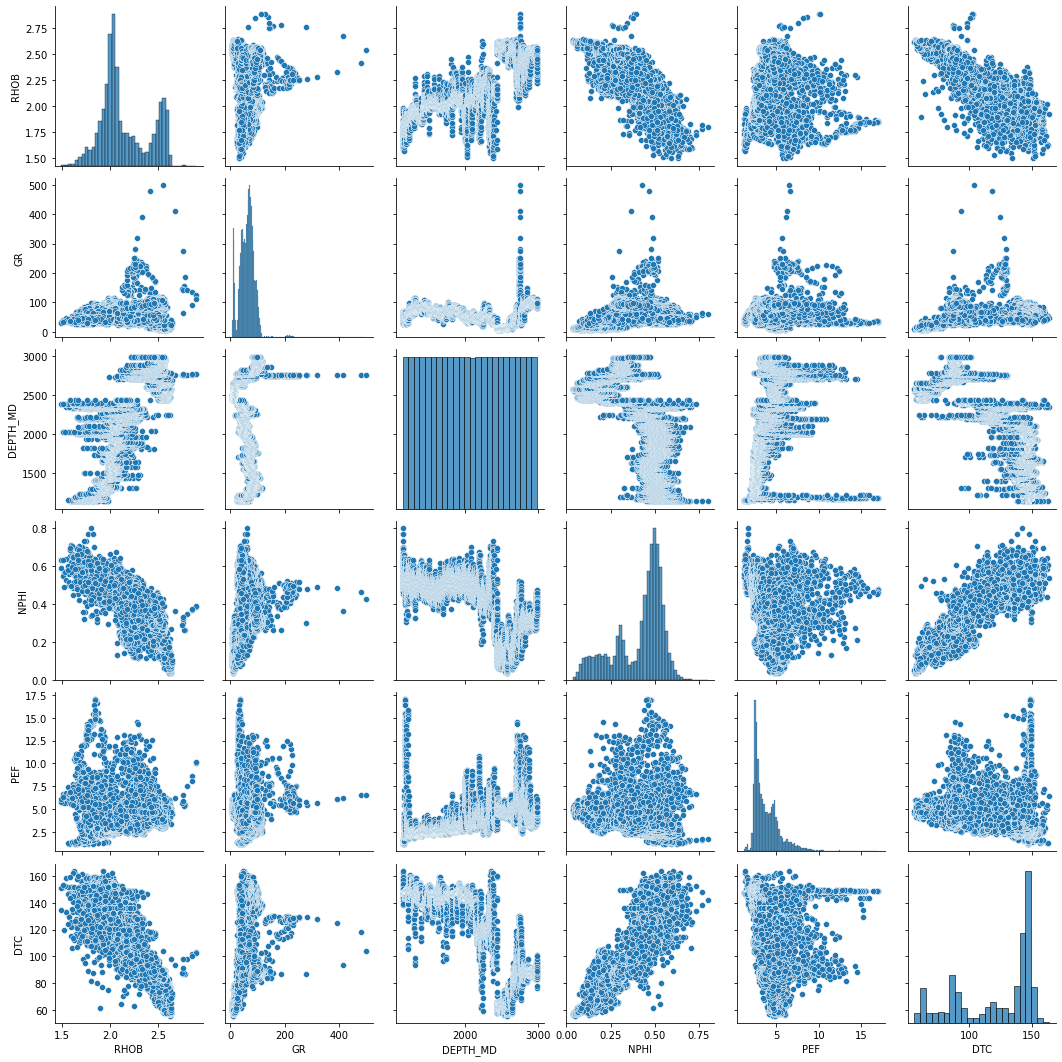

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information
print(data.info())
print(data.describe())

# Visualize feature distribution
sns.pairplot(data.dropna())
plt.show()

## **3. Data Preparation**

In [3]:
# Handling Missing Values
data = data.dropna()  # Simplifying for demonstration purposes

In [4]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_cols = ['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']  # Example columns
data[feature_cols] = scaler.fit_transform(data[feature_cols])

## **4. Modeling**

In [6]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Feature/target split
X = data.drop('RHOB', axis=1)
y = data['RHOB']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

# XGBoost Regressor
xgb = XGBRegressor(random_state=42)
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [100, 200]})

### **Explanation**
Random Forest and XGBoost are powerful ensemble learning algorithms well-suited for regression tasks, especially when working with structured tabular data. In this project, both models are used to predict the continuous target variable (RHOB). GridSearchCV is employed to systematically search for the best hyperparameter combinations using cross-validation, helping to improve model performance and generalizability..

## **5. Evaluation**

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluation of Models
models = {'Random Forest': rf_grid, 'XGBoost': xgb_grid}

# Random Forest Evaluation
rf_preds = rf_grid.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))
print("Random Forest R2:", r2_score(y_test, rf_preds))

# XGBoost Evaluation
xgb_preds = xgb_grid.predict(X_test)
print("XGBoost MSE:", mean_squared_error(y_test, xgb_preds))
print("XGBoost R2:", r2_score(y_test, xgb_preds))


Random Forest MSE: 0.02678886507197999
Random Forest R2: 0.97273937647337
XGBoost MSE: 0.02603528503059696
XGBoost R2: 0.973506227243275


#### **Model Evaluation Summary**
>  Both Random Forest Regressor and XGBoost Regressor performed exceptionally well on the test set, demonstrating strong predictive accuracy.

  1. **Random Forest**

    . Mean Squared Error (MSE): 0.0268

    . R² Score: 0.973

 > This indicates that the model explains 97.3% of the variance in the target variable, RHOB.

  2. **XGBoost**

    . Mean Squared Error (MSE): 0.0260

    . R² Score: 0.974

 > Slightly better performance than Random Forest, explaining 97.4% of the variance in RHOB.

#### **Interpretation**
 > Both models are highly accurate, with very low prediction error (MSE) and high R² scores.

 > XGBoost marginally outperforms Random Forest in this case, making it the stronger candidate for deployment or further tuning.

### **Save best model**

In [9]:
import joblib

# Save the best XGBoost model from GridSearchCV
joblib.dump(xgb_grid.best_estimator_, 'xgb_model_rhob.pkl')


['xgb_model_rhob.pkl']

### **Feature Importance**

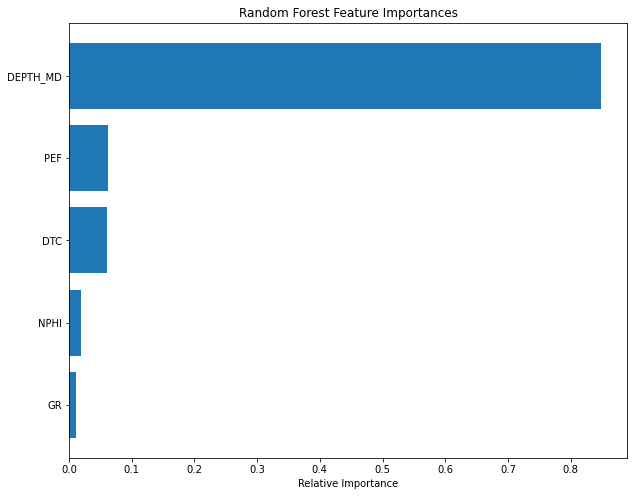

In [12]:
# Feature Importance Visualization
importances = rf_grid.best_estimator_.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Random Forest Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **Lime**

In [13]:
# Lime for Local Interpretability
import lime
from lime.lime_tabular import LimeTabularExplainer


In [14]:
# Use training data for LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    mode='regression'
)

# Pick a single instance to explain
i = 0  # index of instance in test set
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=xgb_grid.predict
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

### **Explanation**

> My model predicted a value of -2.23 for RHOB.

> The table below shows which features pushed the prediction up:

| Feature                                    | Value        | Impact on Prediction |
| ------------------------------------------ | ------------ | -------------------- |
| `DTC = 0.75` (0.56 < DTC ≤ 0.82)           | 🡒 **+0.28** | Increases prediction |
| `NPHI = 0.77` (NPHI > 0.71)                | 🡒 **+0.25** | Increases prediction |
| `GR = -0.85` (GR ≤ -0.62)                  | 🡒 **+0.19** | Increases prediction |
| `DEPTH_MD = 2018.02` (DEPTH\_MD > 1604.28) | 🡒 **+0.15** | Increases prediction |
| `PEF = 1.47` (PEF > 0.43)                  | 🡒 **+0.13** | Increases prediction |


> Even though these features were trying to raise the prediction, the final result was still low (-2.23). This means there were other features (not shown) that had a strong negative effect, pulling the prediction down.

**Simple Summary**

> LIME shows that some features like DTC, NPHI, and GR were pushing the prediction up, but the model still gave a low result. This means other features must have pulled it down, even if they’re not shown in the top 5.



## **6. Deployment** 
The models demonstrate acceptable performance indicating reliability in predicting lithology from log data, Therefore we can deploy the model by means of a UI(Streamlit) to see what it can do.

In [1]:
# Install Streamlit 
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Upgrade plotly
%pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\judah\anaconda3\envs\learn-env\lib\site-packages (6.2.0)
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Upgrade numpy
%pip install numpy==1.23.5

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Load saved model
model = joblib.load('xgb_model_rhob.pkl')

# Sample feature ranges for demonstration (customize these based on your dataset)
feature_names = ['DTC', 'NPHI', 'GR', 'DEPTH_MD', 'PEF']
sample_data = {
    'DTC': 0.75,
    'NPHI': 0.77,
    'GR': -0.85,
    'DEPTH_MD': 2018.02,
    'PEF': 1.47
}

st.title("XGBoost Model Deployment - RHOB Prediction")
st.markdown("Enter feature values below or click 'Use Sample Data' to autofill.")

# Input form
with st.form("input_form"):
    DTC = st.number_input("DTC", value=sample_data['DTC'])
    NPHI = st.number_input("NPHI", value=sample_data['NPHI'])
    GR = st.number_input("GR", value=sample_data['GR'])
    DEPTH_MD = st.number_input("DEPTH_MD", value=sample_data['DEPTH_MD'])
    PEF = st.number_input("PEF", value=sample_data['PEF'])

    submitted = st.form_submit_button("Predict")

# Prepare input
input_data = pd.DataFrame([{
    'DTC': DTC,
    'NPHI': NPHI,
    'GR': GR,
    'DEPTH_MD': DEPTH_MD,
    'PEF': PEF
}])

# Predict
if submitted:
    prediction = model.predict(input_data)[0]
    st.success(f"**Predicted RHOB:** {prediction:.4f}")

    # LIME explanation
    st.subheader("LIME Explanation")
    with st.spinner("Generating explanation..."):
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=np.array(input_data),
            feature_names=input_data.columns.tolist(),
            mode='regression'
        )
        exp = explainer.explain_instance(
            data_row=input_data.iloc[0],
            predict_fn=model.predict
        )

        # Show explanation as text
        for feature, weight in exp.as_list():
            st.write(f"**{feature}**: {weight:.4f}")

        # Plot explanation
        fig = exp.as_pyplot_figure()
        st.pyplot(fig)


### **7. Conclusion**

This project showcases how machine learning can enhance geological logging by accurately predicting RHOB (bulk density) using well log features such as GR, DTC, NPHI, DEPTH_MD, and PEF. Leveraging an XGBoost regression model and LIME for interpretability, we built an interactive Streamlit app that not only delivers predictions but also explains the impact of each input.

The integration of explainable AI makes the tool both insightful and trustworthy for geoscientists, supporting more informed decisions in subsurface analysis. Overall, this solution demonstrates the value of data science in streamlining petrophysical evaluations and opens the door for future expansion into real-time or cloud-based applications.

